In [121]:
import os
from tensorboard.backend.event_processing import event_accumulator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import FEATURES_DIR, RESULTS_DIR
from analyses.ridge_regression_decoding_mni_mmda import NUM_CV_SPLITS, REGRESSION_MODEL_PYTORCH, REGRESSION_MODEL_SKLEARN, HyperParameters, DISTANCE_METRICS, GLM_OUT_DIR

plt.style.use('seaborn-v0_8-deep')
from glob import glob
from glob import escape as gescape
from scipy.stats import sem
import pickle
from tqdm import tqdm

from notebook_utils import load_results_data

In [135]:
training_mode = "train"
regression_models = [REGRESSION_MODEL_SKLEARN]
distance_metrics = ["cosine", "euclidean"]
subjects = ['sub-01', 'sub-02', 'sub-04', 'sub-05', 'sub-07']
# subjects = ['sub-01', 'sub-02', 'sub-04']

all_data = load_results_data(training_mode, regression_models, distance_metrics, subjects)

# Filter out PCA'd models
all_data = all_data[~all_data.model.str.contains("PCA")]

In [163]:
def plot_test_metrics(data, distance_metric = 'cosine'):
    metrics = [f'acc_{distance_metric}', f'acc_{distance_metric}_captions', f'acc_{distance_metric}_images', 'rsa']
    data_filtered = data[data.metric.isin(metrics)]
    # data_filtered = data

    sns.set_style("ticks", {'axes.grid' : True})
    g = sns.catplot(data_filtered, kind="bar", x="subject", y="value", col="metric", height=4, aspect=1, hue="model")#, palette="Set3"
    g._legend.remove()
    g.fig.legend(loc='upper left',ncol=2, title="", bbox_to_anchor=(1.1, 1.05))

    g.set(ylim=(0, 1))
    
    plt.suptitle("Test Performance", fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "model_comparison.png"), dpi=300)


sklearn_alpha=100000.0_full_train_best_val_acc


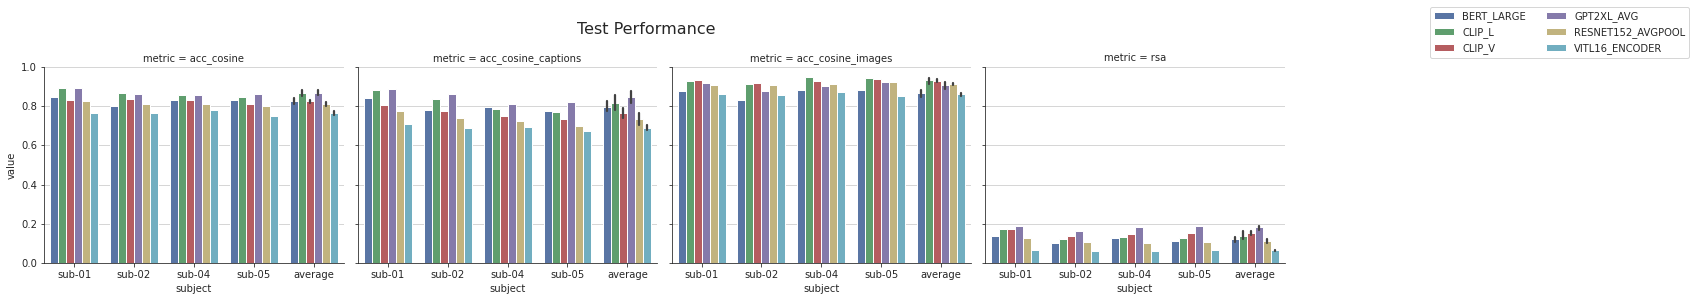

In [164]:
data_to_plot = all_data

data_to_plot = data_to_plot[data_to_plot.hp_str.str.contains("_full_train_best_val_acc")]

assert len(data_to_plot.hp_str.unique()) == 1
print(data_to_plot.hp_str.unique()[0])

plot_test_metrics(data_to_plot)